# Movie Collection Regressor

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
tf.__version__

'2.3.0'

In [3]:
keras.__version__

'2.4.0'

In [4]:
X_data = pd.read_csv('Movie_collection_Independent.csv')

In [5]:
Y_data = pd.read_csv('Movie_collection_Target.csv')

In [6]:
X_data.shape

(506, 19)

In [7]:
Y_data.shape

(506, 1)

In [8]:
X_data.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [9]:
Y_data.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [10]:
X_data.describe()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,92.270471,77.273557,0.445305,34911.144022,142.074901,8.014002,8.185613,8.019664,8.190514,7.810870,449860.715415,157.218182,260.832095,39.181818,545.043478,0.551383,0.361660,0.191700,0.306324
std,172.030902,13.720706,0.115878,3903.038232,28.148861,1.054266,1.054290,1.059899,1.049601,0.659699,68917.763145,31.169624,104.779133,12.513697,106.332889,0.497845,0.480957,0.394028,0.461422
min,20.126400,55.920000,0.129000,19781.355000,76.400000,3.840000,4.035000,3.840000,4.030000,6.600000,212912.000000,0.000000,201.152000,3.000000,333.000000,0.000000,0.000000,0.000000,0.000000
25%,21.640900,65.380000,0.376000,32693.952500,118.525000,7.316250,7.503750,7.296250,7.507500,7.200000,409128.000000,132.490000,223.796000,28.000000,465.000000,0.000000,0.000000,0.000000,0.000000
50%,25.130200,74.380000,0.462000,34488.217500,151.000000,8.307500,8.495000,8.312500,8.465000,7.960000,462460.000000,159.980000,254.400000,39.000000,535.500000,1.000000,0.000000,0.000000,0.000000
75%,93.541650,91.200000,0.551000,36793.542500,167.575000,8.865000,9.030000,8.883750,9.030000,8.260000,500247.500000,181.610000,283.416000,50.000000,614.750000,1.000000,1.000000,0.000000,1.000000
max,1799.524000,110.480000,0.615000,48772.900000,173.500000,9.435000,9.540000,9.425000,9.635000,9.400000,567784.000000,217.520000,2022.400000,60.000000,868.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
Y_data.describe()

,Collection
count,506.000000
mean,2.168590
std,0.612145
min,1.000000
25%,1.801667
50%,2.080000
75%,2.333333
max,4.000000


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, random_state = 42)

In [14]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train, random_state = 42)

In [15]:
X_train.shape, Y_train.shape

((284, 19), (284, 1))

In [16]:
X_valid.shape, Y_valid.shape

((95, 19), (95, 1))

In [17]:
X_test.shape, Y_test.shape

((127, 19), (127, 1))

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [21]:
np.random.seed(42)
tf.random.set_seed(42)

In [22]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]))
model.add(keras.layers.Dense(30, activation="relu"))
model.add(keras.layers.Dense(1))

"""model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[19]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])"""

'model = keras.models.Sequential([\n    keras.layers.Dense(30, activation="relu", input_shape=[19]),\n    keras.layers.Dense(30, activation="relu"),\n    keras.layers.Dense(1)\n])'

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                600       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [24]:
weights, biases = model.layers[1].get_weights()

In [25]:
weights

array([[ 0.11883286, -0.00981644,  0.27258477, -0.1567307 ,  0.1461946 ,
         0.24828193,  0.2825484 ,  0.15769273, -0.0953387 ,  0.02984086,
        -0.1507749 ,  0.12481081, -0.24056977,  0.02203694,  0.13591266,
         0.23718205, -0.10139847, -0.206322  , -0.03677598,  0.25350466,
        -0.22892447, -0.23895451,  0.0477182 ,  0.27936706,  0.26478288,
         0.06140178,  0.07016981,  0.20293137,  0.21041659,  0.24766001],
       [-0.30751744, -0.00121769,  0.04745734,  0.11739606,  0.16426632,
         0.2586389 , -0.05755207,  0.23812923,  0.02460268, -0.04595992,
        -0.0625037 ,  0.10513464, -0.21283352, -0.20099282,  0.2975082 ,
        -0.27739668,  0.01919341,  0.30800548, -0.01600462,  0.23064098,
        -0.18783253, -0.24382138, -0.09423432,  0.11527884, -0.20169723,
         0.20007607,  0.09898975,  0.26931575, -0.16496243,  0.21288183],
       [-0.28608954,  0.19018927,  0.20866397, -0.22560719,  0.22875145,
         0.29770955,  0.11255136,  0.04055572,  0

In [26]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

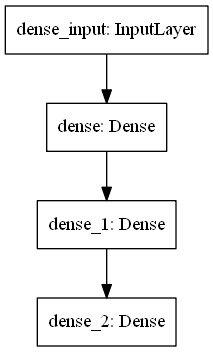

In [27]:
import pydot
keras.utils.plot_model(model)

In [28]:
model.compile(loss="mean_squared_error",
             optimizer=keras.optimizers.SGD(lr=1e-2),
             metrics=["mae"])

In [29]:
model_history = model.fit(X_train, Y_train, epochs=100,
                         validation_data=(X_valid, Y_valid))

Epoch 1/100
9/9 [==============================] - 1s 57ms/step - loss: 3.7051 - mae: 1.6837 - val_loss: 1.5134 - val_mae: 1.0270
Epoch 2/100
9/9 [==============================] - 0s 5ms/step - loss: 0.8049 - mae: 0.7017 - val_loss: 0.7741 - val_mae: 0.6938
Epoch 3/100
9/9 [==============================] - 0s 5ms/step - loss: 0.5344 - mae: 0.5752 - val_loss: 0.5643 - val_mae: 0.5909
Epoch 4/100
9/9 [==============================] - 0s 5ms/step - loss: 0.4031 - mae: 0.4938 - val_loss: 0.4334 - val_mae: 0.5210
Epoch 5/100
9/9 [==============================] - 0s 6ms/step - loss: 0.3196 - mae: 0.4360 - val_loss: 0.3577 - val_mae: 0.4742
Epoch 6/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2654 - mae: 0.3940 - val_loss: 0.3054 - val_mae: 0.4403
Epoch 7/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2292 - mae: 0.3646 - val_loss: 0.2627 - val_mae: 0.4063
Epoch 8/100
9/9 [==============================] - 0s 5ms/step - loss: 0.2028 - mae: 0.3400 - va

9/9 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.1872 - val_loss: 0.0958 - val_mae: 0.2152
Epoch 65/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0652 - mae: 0.1866 - val_loss: 0.0940 - val_mae: 0.2125
Epoch 66/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0646 - mae: 0.1870 - val_loss: 0.0934 - val_mae: 0.2114
Epoch 67/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0641 - mae: 0.1878 - val_loss: 0.0954 - val_mae: 0.2138
Epoch 68/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0636 - mae: 0.1855 - val_loss: 0.0956 - val_mae: 0.2138
Epoch 69/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0637 - mae: 0.1853 - val_loss: 0.0943 - val_mae: 0.2121
Epoch 70/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0625 - mae: 0.1833 - val_loss: 0.0946 - val_mae: 0.2123
Epoch 71/100
9/9 [==============================] - 0s 4ms/step - loss: 0.0629 - mae: 0.1839 - val_loss

In [30]:
model_history.params

{'verbose': 1, 'epochs': 100, 'steps': 9}

In [31]:
model_history.history

{'loss': [3.7051382064819336,
  0.8049361705780029,
  0.5343937277793884,
  0.4030892848968506,
  0.3196466863155365,
  0.2654058039188385,
  0.22918854653835297,
  0.2027868628501892,
  0.18602554500102997,
  0.17118272185325623,
  0.15834027528762817,
  0.1506919115781784,
  0.14323686063289642,
  0.13740918040275574,
  0.13083124160766602,
  0.12692905962467194,
  0.12337269634008408,
  0.11972310394048691,
  0.11679045110940933,
  0.11306772381067276,
  0.11098860204219818,
  0.10840646922588348,
  0.10606019198894501,
  0.10412035882472992,
  0.10202547162771225,
  0.10033942759037018,
  0.09871717542409897,
  0.09766827523708344,
  0.09514549374580383,
  0.0941467434167862,
  0.09169479459524155,
  0.09133154898881912,
  0.0895605981349945,
  0.08890088647603989,
  0.0872143805027008,
  0.08587536215782166,
  0.0849984809756279,
  0.08360110223293304,
  0.08260928094387054,
  0.08193270862102509,
  0.08138072490692139,
  0.08013878762722015,
  0.07925368845462799,
  0.07891229540

In [32]:
evalu = model.evaluate(X_test, Y_test)
print(evalu)

4/4 [==============================] - 0s 1ms/step - loss: 0.2852 - mae: 0.2786
[0.2852456569671631, 0.2785837948322296]


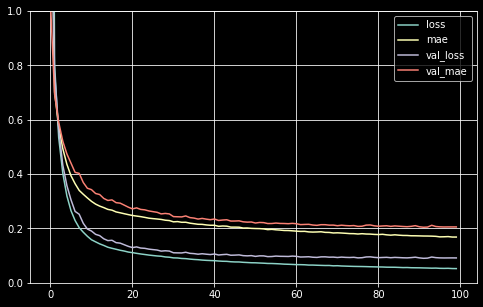

In [33]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0, 1)
plt.grid(True)
plt.show()

In [34]:
X_new = X_test[:5]
pred_y = model.predict(X_new)

In [35]:
print(pred_y)

[[2.5145755]
 [2.6631563]
 [1.8457   ]
 [2.4707603]
 [1.7309108]]


In [36]:
print(Y_test[:5])

     Collection
173    2.240000
274    2.826667
491    1.573333
72     2.186667
452    1.740000
